In [1]:

import torch
import numpy as np
import matplotlib.pyplot as plt
from hypothesis.distribution import MixtureOfNormals
from torch.distributions.normal import Normal

In [27]:
c0 = Normal(torch.tensor([-200.0]), torch.tensor([100.0]))
c1 = Normal(torch.tensor([0.0]), torch.tensor([100.0]))
c2 = Normal(torch.tensor([200.0]), torch.tensor([100.0]))
dist = MixtureOfNormals([c0, c1, c2], [0.2, 0.4, 0.2])

In [28]:
min_x = np.amin(-1000)
max_x = np.amax(1000)
x_range = np.linspace(float(min_x), float(max_x), 30000)

In [29]:
n_samples = 1000000

In [30]:
samples = []
for i in range(n_samples):
    samples.append(dist.sample().item())

In [31]:
def log_likelihood(x):
    c0 = Normal(torch.tensor([-200.0]), torch.tensor([100.0]))
    c1 = Normal(torch.tensor([0.0]), torch.tensor([100.0]))
    c2 = Normal(torch.tensor([200.0]), torch.tensor([100.0]))
    dist = MixtureOfNormals([c0, c1, c2], [0.2, 0.4, 0.2])
    likelihood = dist.log_prob(x)

    return likelihood

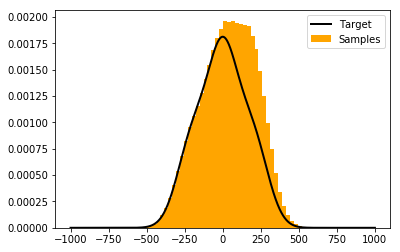

In [32]:
plt.plot(x_range, log_likelihood(torch.from_numpy(x_range).float()).exp().numpy(), lw=2, c='black', label='Target')
plt.hist(samples, bins=50, density=True, color='orange', label='Samples')
plt.legend()
plt.show()

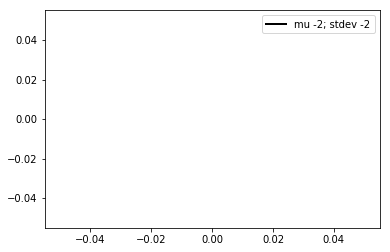

In [34]:
c3 = Normal(0,2)
c4 = Normal(-2,-2)

min_x2 = np.amin(-10)
max_x2 = np.amax(7.5)
x_range2 = np.linspace(float(min_x2), float(max_x2), 30000)

#plt.plot(x_range2, c3.log_prob(torch.from_numpy(x_range2).float()).exp().numpy(), lw=2, c='black', label='mu 0; stdev 2')
plt.plot(x_range2, c4.log_prob(torch.from_numpy(x_range2).float()).exp().numpy(), lw=2, c='black', label='mu -2; stdev -2')
plt.legend()
plt.show()

In [63]:
l = [-10,5,3,11,2,0,3]
t = torch.FloatTensor(l) 
t = t.view(-1, 1)
out = c4.log_prob(t).sum()

In [64]:
out

tensor(nan)

In [65]:
min(1, out.item())

1

In [66]:
if torch.isnan(out.sum()):
    out = torch.FloatTensor([0])
out

tensor([0.])